In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt

In [3]:
# Load data from files

df = pd.read_csv('versions.csv')

total_domains = None
with open('domains_count.txt') as f:
    total_domains = int(f.read())

In [4]:
# Data normalization & processing

versions = df['version']
chart_data_normalized = versions.value_counts(normalize=True)[:10]
chart_data_normalized = chart_data_normalized.apply(lambda x: x * 100)
chart_data = versions.value_counts()[:10]

In [5]:
# Display stats

wordpress_domains = len(versions)
wordpress_domains_as_percentage = 100 * wordpress_domains / total_domains

print
print 'Total domains scanned {}. WordPress detected on {} ({}%) domains.'.format(
    total_domains, wordpress_domains, wordpress_domains_as_percentage
)

sites_updated_to_latest_version = len(df[df['version'].str.contains('4.4.2')])
sites_updated_to_latest_version_percentage = 100 * sites_updated_to_latest_version / wordpress_domains

print 'WordPress domains updated to latest version {} ({}%).'.format(
    sites_updated_to_latest_version, sites_updated_to_latest_version_percentage
)


Total domains scanned 301433. WordPress detected on 24355 (8%) domains.
WordPress domains updated to latest version 8788 (36%).


<IPython.core.display.Javascript object>


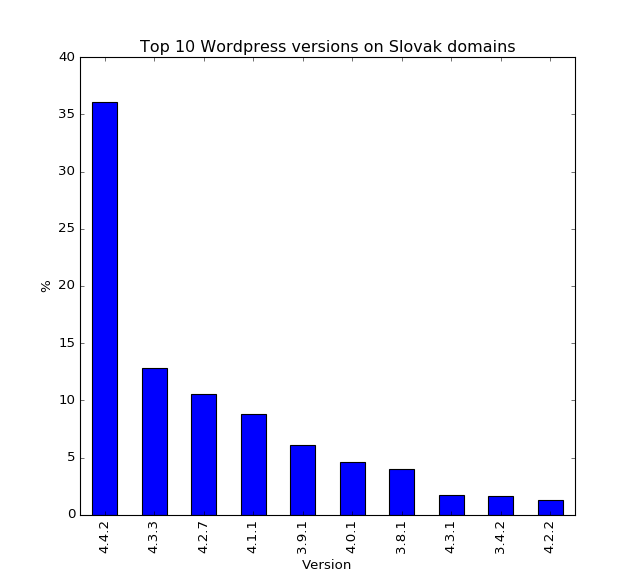

In [6]:
# Display chart of top 10 WordPress versions

plot = chart_data_normalized.plot(kind='bar')
plot.set_title("Top 10 Wordpress versions on Slovak domains")
plot.set_xlabel("Version")
plot.set_ylabel("%")